In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import joblib
from tkinter import *
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [2]:
data = pd.read_csv('dataset/fish_data.csv')

## 1. Display Top 5 Rows of The Dataset

In [3]:
data.head()

,Fish Species,Price,Grade,Catching Method,Sustainability,Actual Price
0,Bawal Hitam,36000,B,Farmed,Moderately sustainable,30000
1,Bawal Putih,72000,B,Farmed,Moderately sustainable,60000
2,Cakalang,30000,B,Farmed,Moderately sustainable,25000
3,Kakap Merah,66000,B,Farmed,Moderately sustainable,55000
4,Kembung,30000,B,Farmed,Moderately sustainable,25000


## 2. Find Shape Fish Dataset (Number of Rows And Number of Columns)

In [4]:
data.shape

(264, 6)

## 3. Check Null Values In The Dataset

In [5]:
data.isnull().sum()

Fish Species       0
Price              0
Grade              0
Catching Method    0
Sustainability     0
Actual Price       0
dtype: int64

In [6]:
data.describe()

,Price,Actual Price
count,264.000000,264.000000
mean,49903.363636,68454.545455
std,59375.759491,69461.411301
min,6000.000000,25000.000000
25%,19200.000000,30000.000000
50%,30200.000000,55000.000000
75%,55250.000000,70000.000000
max,403200.000000,280000.000000


In [7]:
sorted(data['Price'],reverse=False)

[6000,
 6000,
 7200,
 7200,
 7500,
 7500,
 8000,
 8000,
 9000,
 9000,
 9120,
 9600,
 9600,
 10000,
 10000,
 10000,
 10000,
 11400,
 12000,
 12000,
 12000,
 12000,
 12000,
 12000,
 12000,
 12000,
 12160,
 12500,
 12500,
 13200,
 14400,
 14400,
 14400,
 14400,
 14400,
 14400,
 14400,
 14400,
 15000,
 15000,
 15000,
 15000,
 15000,
 15000,
 15200,
 15200,
 16000,
 16000,
 16500,
 16800,
 17280,
 17280,
 17600,
 18000,
 18000,
 18000,
 18000,
 18000,
 18000,
 18000,
 18000,
 18240,
 18240,
 19000,
 19200,
 19200,
 19200,
 19200,
 19200,
 19200,
 19200,
 20000,
 20000,
 20000,
 20000,
 21000,
 21600,
 21600,
 21888,
 22000,
 22000,
 22400,
 22800,
 22800,
 23040,
 23040,
 24000,
 24000,
 24000,
 24000,
 24000,
 24000,
 24000,
 24000,
 24000,
 24000,
 24000,
 24000,
 24000,
 24000,
 24000,
 24320,
 25000,
 25000,
 25600,
 26400,
 26400,
 27360,
 27500,
 28000,
 28000,
 28800,
 28800,
 28800,
 28800,
 28800,
 28800,
 28800,
 28800,
 28800,
 28800,
 28800,
 28800,
 29184,
 30000,
 30000,
 3000

## 4. Encoding the Categorical Columns

In [8]:
data['Grade'].unique()
data['Grade'] = data['Grade'].map({'C':0,'B':1,'A':2})

In [9]:
data['Sustainability'].unique()
data['Sustainability'] =data['Sustainability'].map({'Moderately sustainable':1,'Unsustainable':0})


In [10]:
data['Catching Method'].unique()
data['Catching Method'] = data['Catching Method'].map({'Farmed':3,'Netting':2, 'Spearfishing':0, 'Fishing Hook':1})

## 5. Transform the 'Actual Price' and 'Price' columns in the data DataFrame using MinMaxScaler

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaler2 = MinMaxScaler(feature_range=(0,1))
data['Actual Price'] = scaler.fit_transform(data[['Actual Price']])
data['Price'] = scaler2.fit_transform(data[['Price']])

In [12]:
data.head()

,Fish Species,Price,Grade,Catching Method,Sustainability,Actual Price
0,Bawal Hitam,0.075529,1,3,1,0.019608
1,Bawal Putih,0.166163,1,3,1,0.137255
2,Cakalang,0.060423,1,3,1,0.000000
3,Kakap Merah,0.151057,1,3,1,0.117647
4,Kembung,0.060423,1,3,1,0.000000


In [13]:
print(scaler.inverse_transform(data[['Actual Price']]))

[[ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]

In [14]:
data

,Fish Species,Price,Grade,Catching Method,Sustainability,Actual Price
0,Bawal Hitam,0.075529,1,3,1,0.019608
1,Bawal Putih,0.166163,1,3,1,0.137255
2,Cakalang,0.060423,1,3,1,0.000000
3,Kakap Merah,0.151057,1,3,1,0.117647
4,Kembung,0.060423,1,3,1,0.000000
...,...,...,...,...,...,...
259,Kuwe,0.041289,0,1,0,0.176471
260,Makerel,0.009063,0,1,0,0.019608
261,Salmon,0.210473,0,1,0,1.000000
262,Tenggiri,0.033233,0,1,0,0.137255


## 6. Store Feature Matrix In X and Response(Target) In Vector y

In [15]:
X = data.drop(['Price', 'Fish Species'],axis=1)
y = data['Price']
print(X.head())
print(y.head())

   Grade  Catching Method  Sustainability  Actual Price
0      1                3               1      0.019608
1      1                3               1      0.137255
2      1                3               1      0.000000
3      1                3               1      0.117647
4      1                3               1      0.000000
0    0.075529
1    0.166163
2    0.060423
3    0.151057
4    0.060423
Name: Price, dtype: float64


## 7. Train, Test, Split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
import tensorflow as tf

### Model 1 humu

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=[4]),
    tf.keras.layers.Dense(1, activation='linear')
])

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error', metrics=['mse'])

In [20]:
history = model.fit(X_train, y_train,validation_data=[X_test,y_test], epochs=100)

Epoch 1/100
7/7 [==============================] - 2s 37ms/step - loss: 0.4023 - mse: 0.4023 - val_loss: 0.3319 - val_mse: 0.3319
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 0.2542 - mse: 0.2542 - val_loss: 0.2195 - val_mse: 0.2195
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 0.1586 - mse: 0.1586 - val_loss: 0.1657 - val_mse: 0.1657
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 0.1110 - mse: 0.1110 - val_loss: 0.1454 - val_mse: 0.1454
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0845 - mse: 0.0845 - val_loss: 0.1366 - val_mse: 0.1366
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0716 - mse: 0.0716 - val_loss: 0.1253 - val_mse: 0.1253
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0602 - mse: 0.0602 - val_loss: 0.1103 - val_mse: 0.1103
Epoch 8/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0504 - mse: 0.0504 - va

### Model 2 humu humu..

In [21]:
model_complex = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=[4]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

In [22]:
model_complex.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error', metrics=['mse'])

In [23]:
history2 = model_complex.fit(X_train, y_train,validation_data=[X_test,y_test], epochs=100)

Epoch 1/100


7/7 [==============================] - 1s 28ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0321 - val_mse: 0.0321
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 3/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 7/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 8/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0049 - mse: 0.0049 - val_los

### Model 3 Humu humu humu...

In [24]:
model_that_she_not_worry_about = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=[4]),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Reshape((2, 10)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8)),
    tf.keras.layers.Dense(1, activation='linear')
])

In [25]:
model_that_she_not_worry_about.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error', metrics=['mse'])

In [26]:
history3 = model_that_she_not_worry_about.fit(X_train, y_train,validation_data=[X_test,y_test], epochs=100)

Epoch 1/100


7/7 [==============================] - 6s 163ms/step - loss: 0.0296 - mse: 0.0296 - val_loss: 0.0525 - val_mse: 0.0525
Epoch 2/100
7/7 [==============================] - 0s 19ms/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0400 - val_mse: 0.0400
Epoch 3/100
7/7 [==============================] - 0s 17ms/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0378 - val_mse: 0.0378
Epoch 4/100
7/7 [==============================] - 0s 18ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0382 - val_mse: 0.0382
Epoch 5/100
7/7 [==============================] - 0s 18ms/step - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0397 - val_mse: 0.0397
Epoch 6/100
7/7 [==============================] - 0s 18ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0385 - val_mse: 0.0385
Epoch 7/100
7/7 [==============================] - 0s 18ms/step - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0358 - val_mse: 0.0358
Epoch 8/100
7/7 [==============================] - 0s 18ms/step - loss: 0.0115 - mse: 0.0115 - val_lo

### Model 4 Humu humu humu humu....

In [27]:
model_using_huber = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=[4]),
    tf.keras.layers.Dense(25, activation='relu'),  # Add an additional dense layer to match the expected output shape
    tf.keras.layers.Reshape((5, 5)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8)),
    tf.keras.layers.Dense(1)
])

In [28]:
model_using_huber.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber(), metrics=['mse'])

In [29]:
history4 = model_using_huber.fit(X_train, y_train,validation_data=[X_test,y_test], epochs=100)

Epoch 1/100
7/7 [==============================] - 4s 177ms/step - loss: 0.0078 - mse: 0.0157 - val_loss: 0.0184 - val_mse: 0.0368
Epoch 2/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0067 - mse: 0.0134 - val_loss: 0.0175 - val_mse: 0.0350
Epoch 3/100
7/7 [==============================] - 0s 17ms/step - loss: 0.0062 - mse: 0.0125 - val_loss: 0.0179 - val_mse: 0.0359
Epoch 4/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0059 - mse: 0.0119 - val_loss: 0.0176 - val_mse: 0.0352
Epoch 5/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0058 - mse: 0.0115 - val_loss: 0.0162 - val_mse: 0.0324
Epoch 6/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0055 - mse: 0.0109 - val_loss: 0.0152 - val_mse: 0.0305
Epoch 7/100
7/7 [==============================] - 0s 18ms/step - loss: 0.0052 - mse: 0.0104 - val_loss: 0.0146 - val_mse: 0.0293
Epoch 8/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0051 - mse: 0.0

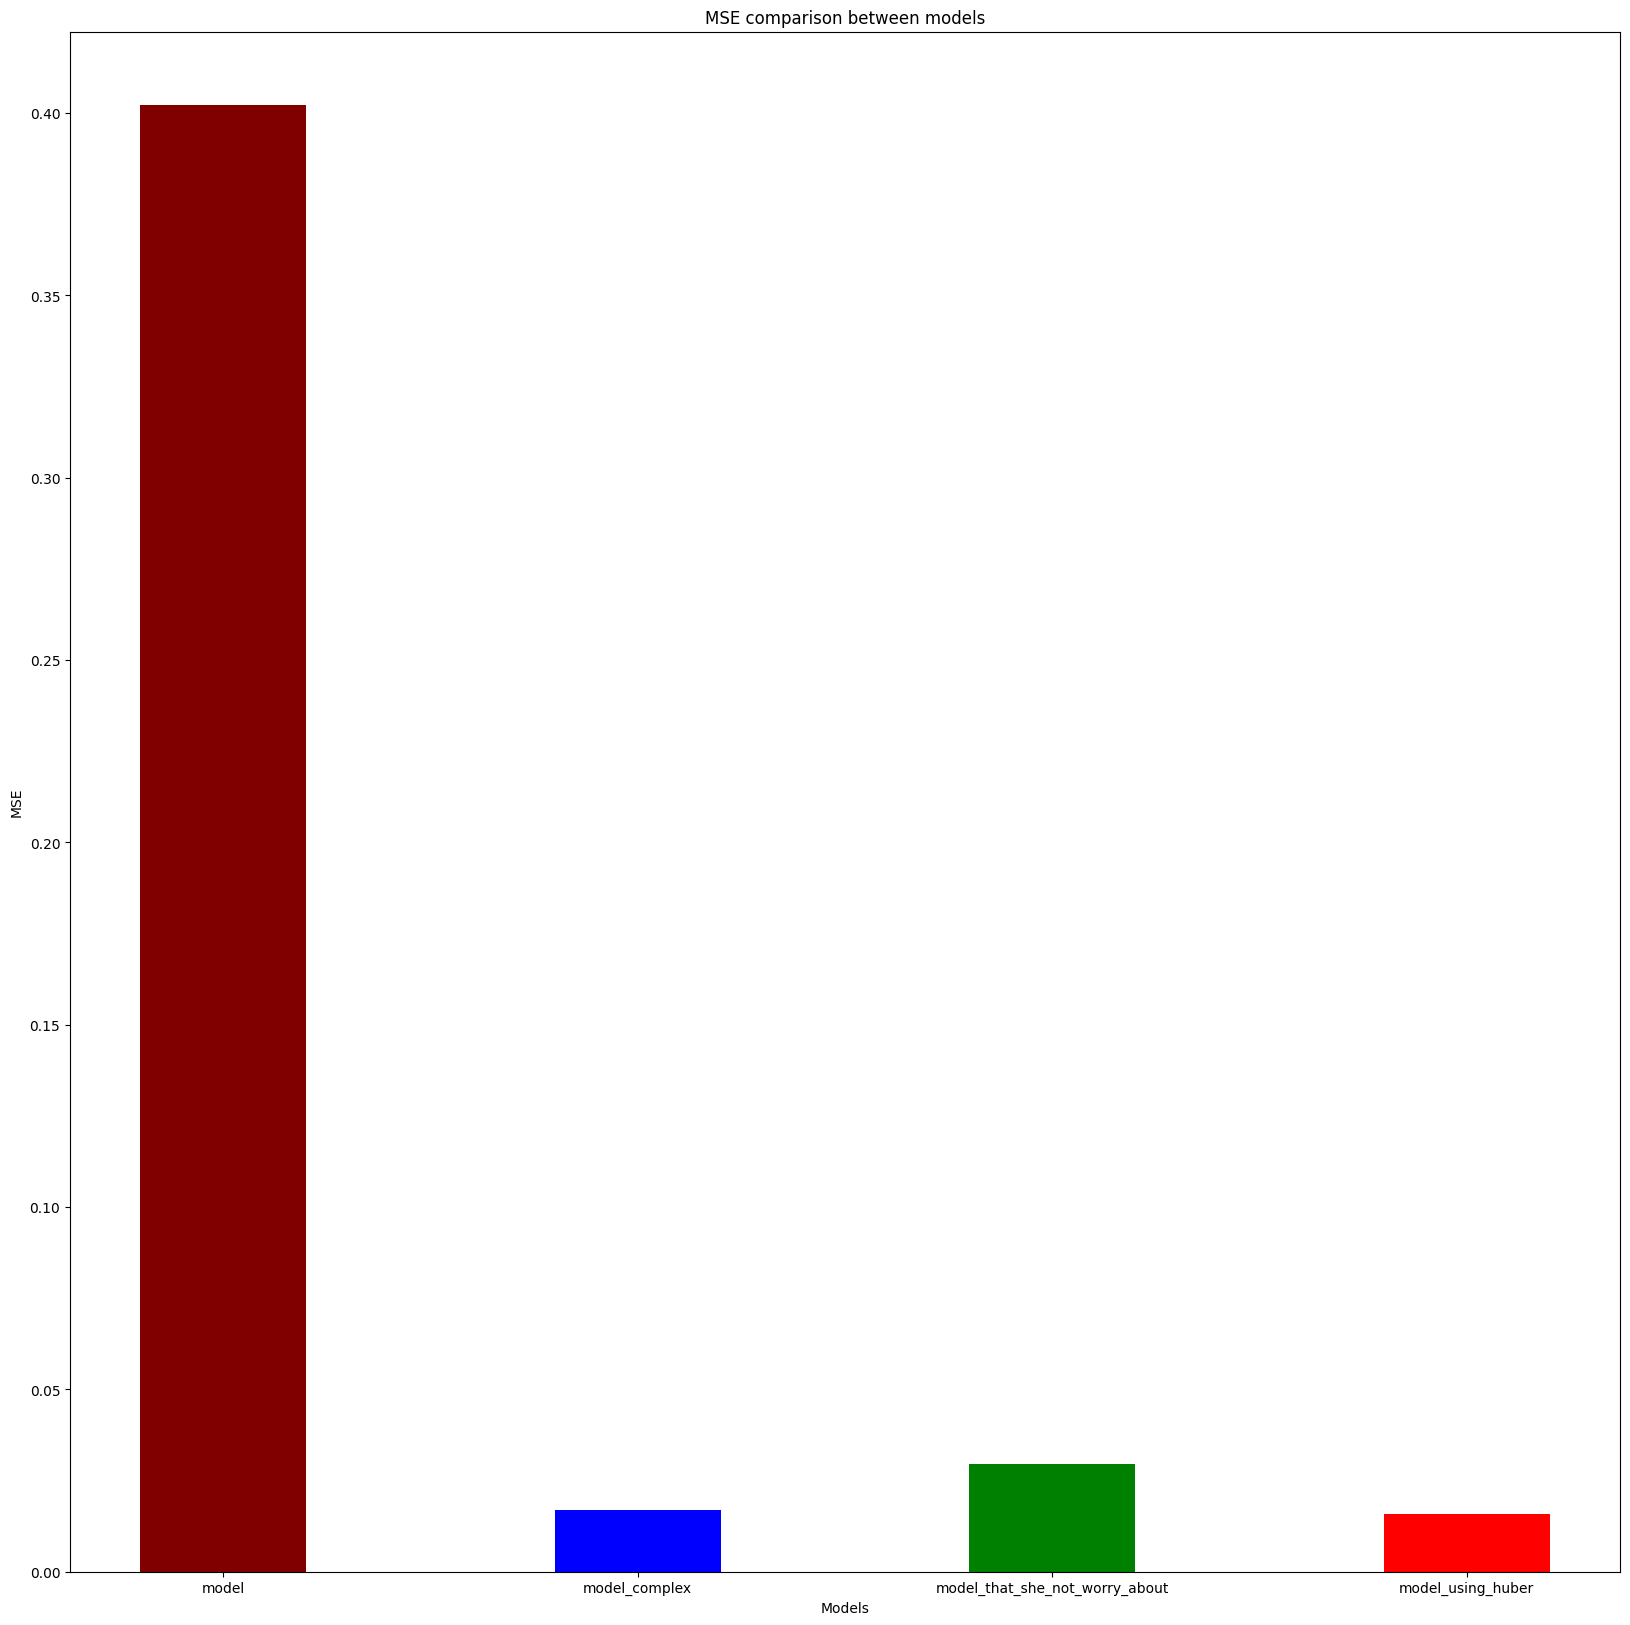

In [30]:

import matplotlib.pyplot as plt 

fig = plt.figure(figsize = (20, 20))

# creating the bar plot
plt.bar("model",history.history['mse'], color ='maroon', width = 0.4)
plt.bar("model_complex",history2.history['mse'], color ='blue', width = 0.4)
plt.bar("model_that_she_not_worry_about",history3.history['mse'], color ='green', width = 0.4)
plt.bar("model_using_huber",model_using_huber.history.history['mse'], color ='red', width = 0.4)

plt.xlabel("Models")
plt.ylabel("MSE")
plt.title("MSE comparison between models")
plt.show()


(0.0, 50.0)

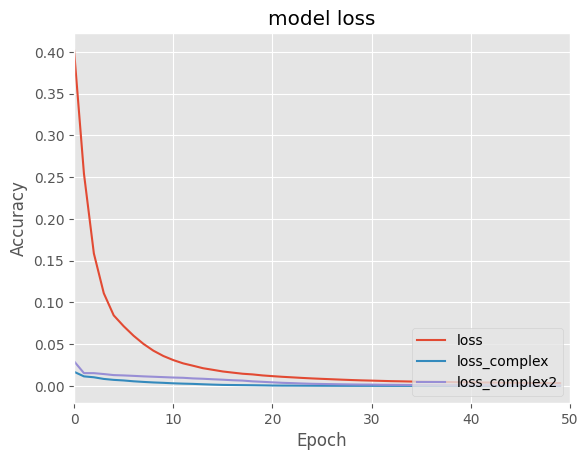

In [31]:


plt.style.use('ggplot')
plt.title('model loss')
plt.plot(history.history['mse'][:50], label='loss')
plt.plot(history2.history['mse'][:50], label='loss_complex')
plt.plot(history3.history['mse'][:50], label='loss_complex2')


plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.xlim(0, 50)


In [32]:
y_pred1 = model.predict(X_test)
score1 = metrics.r2_score(y_test,y_pred1)
y_pred2 = model_complex.predict(X_test)
score2 = metrics.r2_score(y_test,y_pred2)
y_pred3 = model_that_she_not_worry_about.predict(X_test)
score3 = metrics.r2_score(y_test,y_pred3)
y_pred4 = model_using_huber.predict(X_test)
score4 = metrics.r2_score(y_test,y_pred4)
print('model1 : ',score1)
print('model2 : ',score2)
print('model3 : ',score3)
print('model4 : ',score4)

2/2 [==============================] - 1s 4ms/step
model1 :  0.9507678988200068
model2 :  0.986476486989768
model3 :  0.9879515513699926
model4 :  0.9905922401576048


In [33]:
print(X.shape)
print(y.shape)

(264, 4)
(264,)


In [34]:
arr = scaler.inverse_transform(data[['Actual Price']])
arr2 = []
for array in arr :
    arr2.append(array[0])
    
print(arr2)

[30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0,

In [35]:
arr_price = scaler2.inverse_transform(data[['Price']])
arr_price2 = []
for array in arr_price :
    arr_price2.append(array[0])
print(arr_price2)

[36000.0, 72000.0, 30000.0, 66000.0, 30000.0, 96000.0, 83999.99999999999, 36000.0, 336000.0, 72000.0, 45600.0, 43200.0, 86399.99999999999, 36000.0, 79200.0, 36000.0, 115200.00000000001, 100800.0, 43200.0, 403200.0, 86399.99999999999, 54720.0, 18000.0, 36000.0, 15000.0, 33000.0, 15000.0, 48000.0, 42000.0, 18000.0, 168000.0, 36000.0, 22800.0, 30000.0, 59999.999999999985, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 59999.999999999985, 38000.0, 36000.0, 72000.0, 30000.0, 66000.0, 30000.0, 96000.0, 83999.99999999999, 36000.0, 336000.0, 72000.0, 45600.0, 15000.0, 30000.0, 12500.0, 27500.0, 12500.0, 40000.0, 35000.0, 15000.0, 140000.0, 30000.0, 19000.0, 18000.0, 36000.0, 15000.0, 33000.0, 15000.0, 48000.0, 42000.0, 18000.0, 168000.0, 36000.0, 22800.0, 21600.0, 43200.0, 18000.0, 39600.0, 18000.0, 57600.00000000001, 50400.0, 21600.0, 201600.0, 43200.0, 27360.0, 9000.0, 18000.0, 7500.0, 16500.0, 7500.0, 24000.0, 21000.0, 9000.0, 83999.99999999999, 18000.0, 11400.0, 24000.0, 4

9/9 [==============================] - 0s 3ms/step


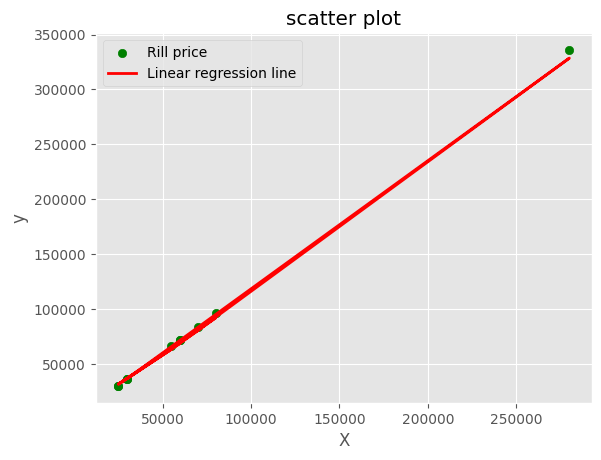

In [36]:
xt = X.T
y_pred_humu = model_that_she_not_worry_about.predict(X)
plt.scatter(arr2[:10], arr_price2[:10], color='green', label='Rill price')
plt.plot(arr2[:10], scaler2.inverse_transform(y_pred_humu[:10]), color='red', linewidth=2, label='Linear regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('scatter plot')
plt.show()

In [37]:
# model.save('D:\\TITO\\Documents\\BANGKIT\\capstone\\bloomy_price_prediction\\bloomy-price-predictor\\price_predictor.h5')

In [38]:
# model_complex.save('D:\\TITO\\Documents\\BANGKIT\\capstone\\bloomy_price_prediction\\bloomy-price-predictor\\price_predictor_complex.h5')

In [39]:
# model_that_she_not_worry_about.save('D:\\TITO\\Documents\\BANGKIT\\capstone\\bloomy_price_prediction\\bloomy-price-predictor\\price_predictor_complex_lstm.h5')

In [40]:
# model_using_huber.save('D:\\TITO\\Documents\\BANGKIT\\capstone\\bloomy_price_prediction\\bloomy-price-predictor\\price_predictor_complex_lstm_huber.h5')

In [41]:
import numpy as np
import math

In [42]:
def round_to_multiple(number, multiple):
    towards = multiple * ((number + multiple - 1) // multiple)
    downwards = multiple * (number // multiple)

    if abs(number - towards) < abs(number - downwards):
        return towards
    else:
        return downwards

In [43]:
def predict_price(data, model):
    prediction = model.predict(data)
    prediction = scaler2.inverse_transform(prediction)
    prediction_float = prediction.item()
    rounded_value = round_to_multiple(round(prediction_float, 0),1000)
    
    return rounded_value

In [44]:
# mapping sorted from 0 to 4 guide
# Grade = C,B,A
# Catching method = Spearfishing, Fishing Hook, Netting, Farmed
# Sustainability = Unsustainable, Moderately sustainable

data_new = pd.DataFrame({
    'Grade':2,
    'Catching Method':3,
    'Sustainability':1,
    'Actual Price' : 30000
},index=[0])

if data_new['Grade'].iloc[0] == 0 or data_new['Actual Price'].iloc[0] == 0:
    result_array = np.array([0])
    float_number = float(result_array[0])
    result_array = float_number

else:
    data_new['Actual Price'] = scaler.transform(data_new[['Actual Price']])
    price2 = predict_price(data_new,model_complex)
    price3 = predict_price(data_new,model_that_she_not_worry_about)
    price4 = predict_price(data_new,model_using_huber)
    average_price = round_to_multiple((price2 + price3 + price4)/3, 1000)
    result_array = np.array([price2,price3, price4], dtype=int)
    print(average_price)
    
    
print(result_array)


1/1 [==============================] - 0s 23ms/step
47000.0
[46000 50000 46000]
